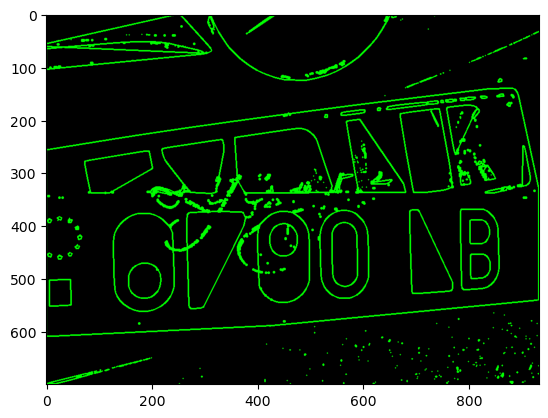

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('IMG_7833.PNG')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold or edge detection (you can use Canny edge detection)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw the convex hull
hull_image = np.zeros_like(image)

# Loop over the contours and compute convex hull
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(hull_image, [hull], 0, (0, 255, 0), 2)  # Green hull lines

plt.imshow(hull_image)

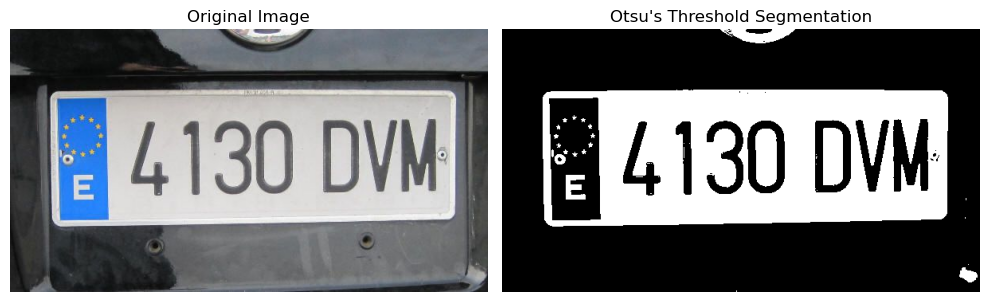

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('IMG_7834.PNG')
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
# Otsu's automatically calculates the optimal threshold value
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plotting the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Otsu Thresholded image
plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Threshold Segmentation")
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

(103, 488, 3)


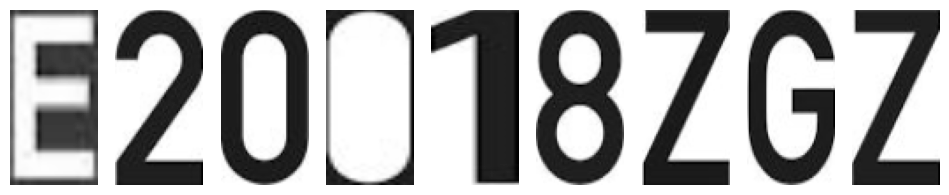

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('../IMG_7835.PNG')
print(image.shape)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # also cv2.RETR_EXTERNAL

# Create a list to store bounding boxes for detected characters
bounding_boxes = []

# Filter and keep only contours that match the size and shape of characters
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Only consider contours with a height-to-width ratio suitable for characters
    aspect_ratio = w / float(h)
    if 0.2 < aspect_ratio < 1.0:  # Modify the size filters as needed
        bounding_boxes.append((x, y, w, h))

# Sort the bounding boxes from left to right
bounding_boxes = sorted(bounding_boxes, key=lambda box: box[0])

# Display the original image with the segmented characters
plt.figure(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(bounding_boxes):
    # Extract each character based on the bounding box
    character = gray[y:y+h, x:x+w]
    
    # Resize each character to a fixed size (optional)
    character = cv2.resize(character, (50, 100))
    
    # Display each segmented character
    plt.subplot(1, len(bounding_boxes), i + 1)
    plt.imshow(character, cmap='gray')
    plt.axis('off')

plt.show()


In [16]:
from PIL import Image
Image.fromarray(image).convert('L').mode

'L'

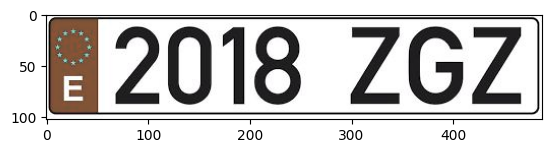

In [5]:
plt.imshow(image)

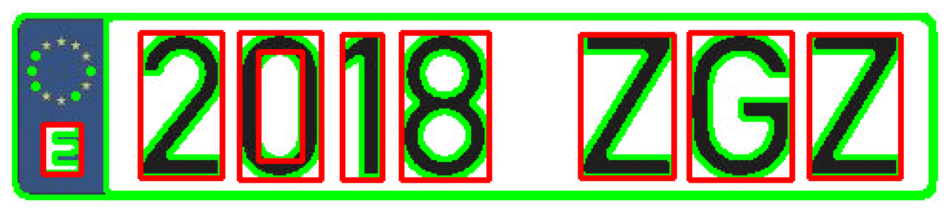

In [27]:
# draw contours on the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Draw bounding boxes on the original image in red
for x, y, w, h in bounding_boxes:
	cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the original image with contours
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()